In [23]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import pandas as pd
import technical_analysis.backtest_kz as bt
from data_pipelines.data_manipulation import DataManipulation
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action = 'ignore', category = pd.errors.PerformanceWarning)
%matplotlib inline

SYMBOL = 'BTC-USD'
scale = 1
range_list = [5, 10, 15, 20, 25]
range_list = [i*scale for i in range_list]
period = '1wk'
interval = '15m'
start_date = ''
end_data = ''
source = 'yahoo'

data = DataManipulation(SYMBOL, source, range_list, period=period, interval=interval, scale=scale, prefix_path='..', saved_to_csv=False)

[*********************100%***********************]  1 of 1 completed
Start TA-LIB module
created indicators columns with TA-LIB


In [24]:
df = data.df.copy()
#bt.bt_plot_indicators(df, "Bitcoin")
df.tail()

,ad,adj_close,adx_10,adx_15,adx_20,adx_25,adx_5,atrr_10,atrr_15,atrr_20,...,willr_20,willr_25,willr_5,wma_10,wma_15,wma_20,wma_25,wma_5,d_r,feature_label
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-11-14 20:45:00+00:00,20561311132.7273,16270.5732,37.8902,28.0753,22.7343,19.8872,63.5214,56.8272,58.6573,60.0461,...,-99.0870,-99.1641,-98.6990,16368.3625,16420.6759,16444.4652,16460.5976,16297.0232,-0.0030,1.0000
2022-11-14 21:00:00+00:00,20560391837.7904,16296.5391,40.2893,29.3746,23.4843,20.3368,67.1963,56.1202,58.0640,59.5317,...,-91.7726,-92.4673,-65.4690,16343.0116,16398.3490,16427.2800,16445.0754,16296.3895,0.0016,0.0000
2022-11-14 21:15:00+00:00,20628372216.8580,16348.9785,41.0168,30.0606,23.9362,20.6146,62.5618,55.8527,57.7561,59.2274,...,-77.0007,-78.9427,-1.2170,16332.9144,16384.3680,16416.1571,16434.5389,16313.2726,0.0032,1.0000
2022-11-14 21:30:00+00:00,20696639763.0186,16354.6182,41.3382,30.5770,24.3040,20.8451,57.1932,51.3378,54.6192,56.8012,...,-75.4121,-75.4121,-2.6096,16328.6885,16372.8945,16406.0397,16425.2872,16327.9382,0.0003,1.0000
2022-11-14 21:34:00+00:00,20696639763.0186,16361.3213,41.4045,30.9777,24.6135,21.0429,51.7264,46.8743,51.4248,54.2963,...,-73.5239,-73.5239,-0.0000,16329.7796,16363.9944,16397.1483,16417.1255,16342.3777,0.0004,1.0000


In [ ]:
pure_df = data.get_symbol_df(SYMBOL, pure=True)
pure_df.head()

In [ ]:
from technical_analysis.indicators import Indicators
ind = Indicators(pure_df, range_list)
ind.create_ind_cols_ta()
test = ind.df
test.tail()

,open,high,low,close,adj_close,volume,SMA_5,lowband_5,midband_5,upband_5,...,stoch_d,ich_kline,ich_tline,fishert,fisherts,AD,OBV,candle_label,candlestick_pattern,log_rt
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-11-12 19:00:00+00:00,16857.8652,16879.9531,16844.2520,16871.0000,16871.0000,0,16881.5484,16840.7948,16881.5484,16922.3021,...,80.9888,16848.3740,16870.5723,0.8014,1.1640,-283878055151529.0000,-1157796848336992.0000,0,NO_PATTERN,0.0009
2022-11-12 20:00:00+00:00,16873.0527,16875.7285,16807.5645,16816.0273,16816.0273,0,16861.3070,16811.9348,16861.3070,16910.6793,...,68.7266,16848.3740,16870.5723,0.3849,0.8014,-283878055151529.0000,-1157796848336992.0000,0,NO_PATTERN,-0.0033
2022-11-12 21:00:00+00:00,16816.8789,16833.8145,16790.7129,16814.3945,16814.3945,13025280,16847.6734,16792.0559,16847.6734,16903.2910,...,51.9401,16848.3740,16870.5723,-0.1622,0.3849,-283878053863638.8125,-1157796861362272.0000,0,NO_PATTERN,-0.0001
2022-11-12 22:00:00+00:00,16815.8516,16815.8516,16815.8516,16815.8516,16815.8516,0,16834.5098,16786.7010,16834.5098,16882.3185,...,29.2169,16859.2256,16873.8262,-0.6787,-0.1622,-283878053863638.8125,-1157796861362272.0000,0,NO_PATTERN,0.0001
2022-11-12 22:01:00+00:00,16814.2441,16814.2441,16814.2441,16814.2441,16814.2441,0,16826.3035,16781.5833,16826.3035,16871.0237,...,11.9984,16859.2256,16873.8262,-1.1612,-0.6787,-283878053863638.8125,-1157796861362272.0000,0,NO_PATTERN,-0.0001


In [ ]:
test.shape, df.shape
test.columns = test.columns.str.lower()
for i in test.columns.to_list():
    if i not in df.columns.to_list():
        print(i)

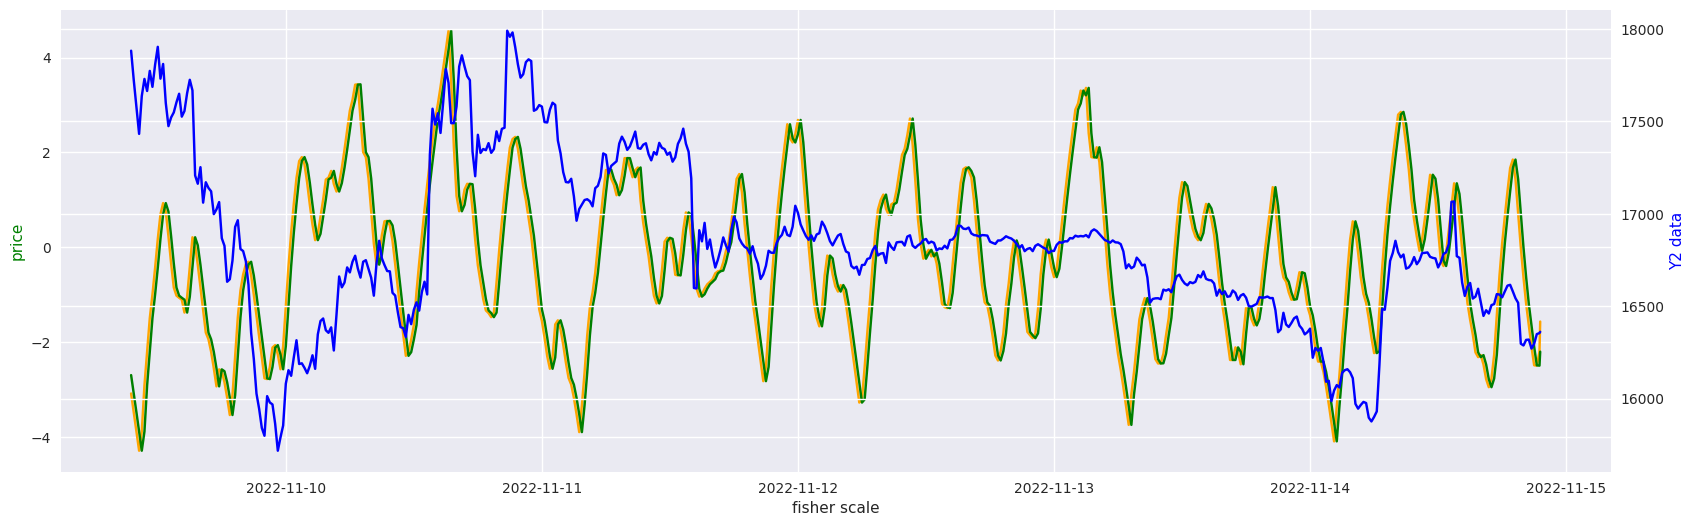

In [25]:
import matplotlib.pyplot as plt
testdf = test['2022-11':].copy()
fig, ax1 = plt.subplots(figsize=(20,6))

ax2 = ax1.twinx()
ax1.plot(df.index, df.fishert, 'orange')
ax1.plot(df.index, df.fisherts, 'g-')
ax2.plot(df.index, df.close, 'b-')

ax1.set_xlabel('fisher scale')
ax1.set_ylabel('price', color='g')
ax2.set_ylabel('Y2 data', color='b')

plt.show()

In [26]:
df.fishert[df.fisherts < -6]

Series([], Name: fishert, dtype: float64)

In [27]:
r = df[['fishert', 'close']]
r.tail(20)

,fishert,close
Datetime,,
2022-11-14 17:00:00+00:00,-2.7615,16505.7773
2022-11-14 17:15:00+00:00,-2.2614,16511.4531
2022-11-14 17:30:00+00:00,-1.4304,16565.2930
2022-11-14 17:45:00+00:00,-0.5942,16562.8730
2022-11-14 18:00:00+00:00,0.0873,16547.9648
2022-11-14 18:15:00+00:00,0.6512,16580.0430
2022-11-14 18:30:00+00:00,1.1801,16611.0918
2022-11-14 18:45:00+00:00,1.6738,16615.5059
2022-11-14 19:00:00+00:00,1.8504,16580.0254
